## Задание

В этом задании вы сможете убедиться, что ЦПТ действительно работает для любых распределений.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Создайте 2 случайных величины из любых выбранных вами распределений (одно непрерывное, второе дискретное). Для разных значений n сгенерируйте 1000 выборок размера n и постройте гистрограммы средних этих выборок. 

In [16]:
# Вначале изучим, как себя ведут непрерывные распределения.
# Мне нравится экспоненциальное (как минимум тем, что на нем ожидаемый результат будет особенно интересно проверить)
random_variable_1 = sts.expon(loc=5, scale=5)

In [53]:
# параметры запуска: размеры выборок и количество повторов генерации
selections = [5, 10, 50,  100]

# Определяем функцию для создания массива из sample_count элементов, 
def generate_selection(n, var, samples_count = 1000, mu=0):
    #массив для сохранения средних по выборке
    means = np.array([])
    for number in range(samples_count):
        # на каждом цикле генерируем выборку (проверка условия - для кастомизации вызова rvs в зависимости от типа распределения)        
        if mu==0:
            sample = var.rvs(size=n)
        else:
            sample = var.rvs(mu=0.6, size=n)
        # считаем среднее по каждой выборке и добавляем в массив средних
        means = np.append(means, sample.mean())
    return means    


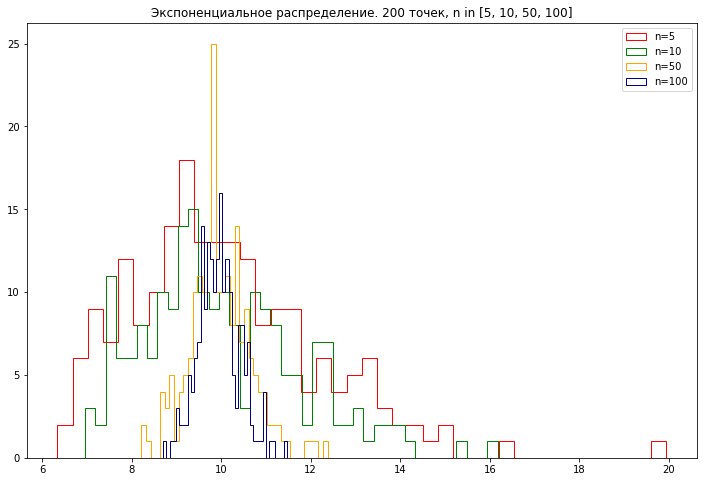

In [59]:
# По условию задачи нужно провести эксперименты при общем количестве выборок 1000
# Тем не менее вначале посмотрим, что получается с 200-ми выборками
sel_means = {}
        
for sel in selections:
    sel_means[sel] = generate_selection(sel, random_variable_1, 200)

plt.figure(figsize=(12,8))

plt.hist(sel_means[5], label='n=5', bins=40, color='red', histtype='step')
plt.hist(sel_means[10], label='n=10', bins=40, color='green', histtype='step')
plt.hist(sel_means[50], label='n=50', bins=40, color='orange', histtype='step')
plt.hist(sel_means[100], label='n=100', bins=40, color='navy', histtype='step')
plt.title('Экспоненциальное распределение. 200 точек, n in [5, 10, 50, 100]')
plt.legend()

# Захотелось с одной стороны использовать гистограмму, а с другой - наложить их несколько друг на друга.
# Вариант histtype='step' позволяет это реализовать. 
# Последовательно можно закомментировать любые из вариантов, чтобы перекрытия гистограмм не были такими насыщенными

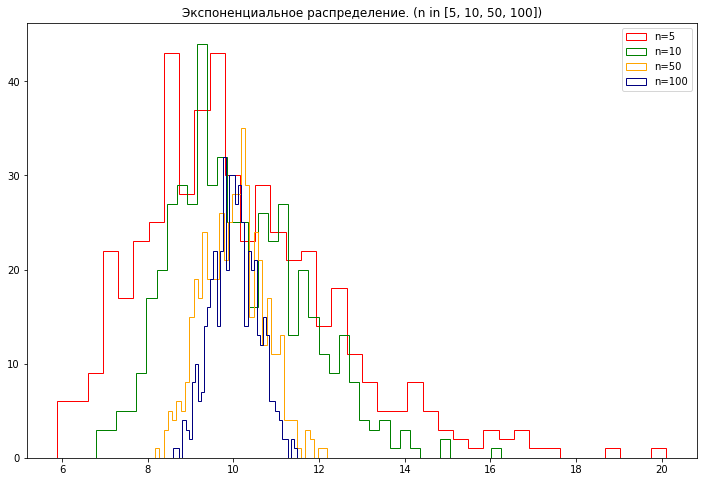

In [60]:
# Теперь то же - для выборок по 500 точек

sel_means = {}
        
for sel in selections:
    sel_means[sel] = generate_selection(sel, random_variable_1, 500)

plt.figure(figsize=(12,8))

plt.hist(sel_means[5], label='n=5', bins=40, color='red', histtype='step')
plt.hist(sel_means[10], label='n=10', bins=40, color='green', histtype='step')
plt.hist(sel_means[50], label='n=50', bins=40, color='orange', histtype='step')
plt.hist(sel_means[100], label='n=100', bins=40, color='navy', histtype='step')
plt.title('Экспоненциальное распределение. (n in [5, 10, 50, 100])')
plt.legend()


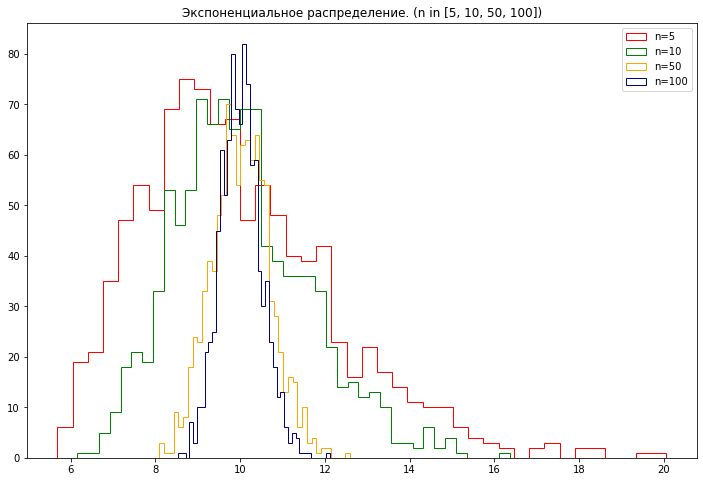

In [61]:
# Ну и наконец - для выборок по 1000 точек, как и требовалось по условию задачи

sel_means = {}
        
for sel in selections:
    sel_means[sel] = generate_selection(sel, random_variable_1, 1000)

plt.figure(figsize=(12,8))

plt.hist(sel_means[5], label='n=5', bins=40, color='red', histtype='step')
plt.hist(sel_means[10], label='n=10', bins=40, color='green', histtype='step')
plt.hist(sel_means[50], label='n=50', bins=40, color='orange', histtype='step')
plt.hist(sel_means[100], label='n=100', bins=40, color='navy', histtype='step')
plt.title('Экспоненциальное распределение. (n in [5, 10, 50, 100])')
plt.legend()

# Хорошо видно, что чем больше n, тем более симметричным оказывается "колокол" распределения и тем он уже (меньше дисперсия)
# Также есть ощущение, что размер выборок, по которым строятся средние значения (200, 500 или 1000)
# почти никакой существенной разницы уже не имеют - все варианты ведут себя примерно одинаково.

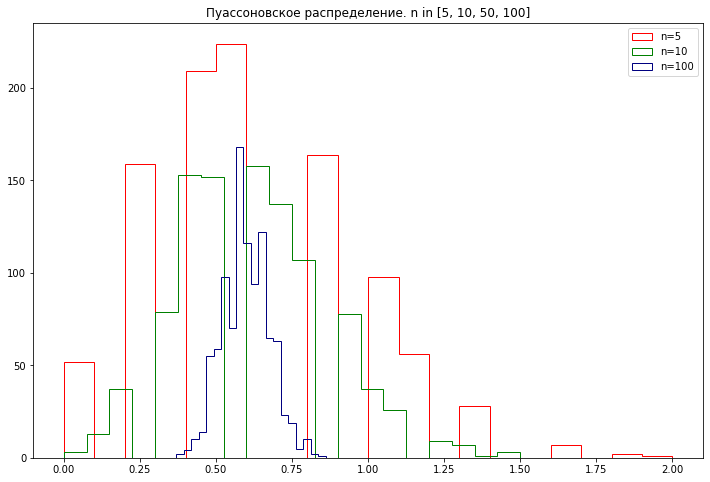

In [64]:
# Дискретное распределение, выбранное мною - пуассоновское.

random_variable_2 = sts.poisson
sel_means = {}
        
for sel in selections:
    sel_means[sel] = generate_selection(sel, random_variable_2, 1000, 0.8)

plt.figure(figsize=(12,8))

plt.hist(sel_means[5], label='n=5', bins=20, color='red', histtype='step')
plt.hist(sel_means[10], label='n=10', bins=20, color='green', histtype='step')
# plt.hist(sel_means[50], label='n=50', bins=20, color='orange', histtype='step')
plt.hist(sel_means[100], label='n=100', bins=20, color='navy', histtype='step')
plt.title('Пуассоновское распределение. n in [5, 10, 50, 100]')
plt.legend()

# С этим распределением общая тенденция стремления распределения средних значений к нормальному тоже заметна,
# и точно также увеличение n приводит к более узкой